In [ ]:
#Libraries
import numpy as np # Math operations
from numpy import genfromtxt
import pandas as pd # Data analisys
import seaborn as sns # Grafication
import sklearn as metrics # IA algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

In [ ]:
# Seaborn initialice
sns.set()

In [ ]:
regressor = LinearRegression() 

In [ ]:
# Data frame
df = pd.read_csv('single_lenses_data.csv')
df_one = pd.read_csv('class_one.csv')

## Table description

We can appreciate the different descriptive values of the database.

In [ ]:
df.describe(include="all")

,AOP,SP,AST,TPR,Class
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.500000,1.500000,2.458333
std,0.834058,0.510754,0.510754,0.510754,0.779028
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.500000,1.500000,1.500000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,3.000000
max,3.000000,2.000000,2.000000,2.000000,3.000000


## Values for each class

These numbers are a representation of the number of elements contained into the database for each class.

In [ ]:
df["Class"].value_counts()

3    15
2     5
1     4
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


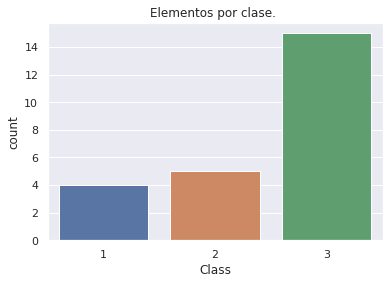

In [ ]:
plt.title("Elementos por clase. ")
sns.countplot(df["Class"])

## Scatter plots with several semantic groupings

Scatter plots are used to find out the strength of the relationship between two numerical variables. The X axis represents the independent variable, while the Y axis represents the dependent variable.

In the next graphic we are going to show if the tear production rate is a factor linked to astigmatism.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


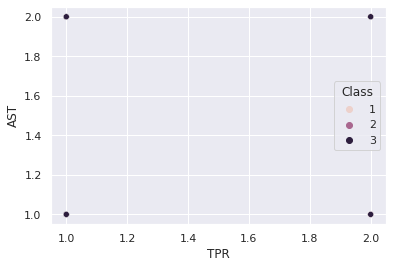

In [ ]:
sns.scatterplot(df['TPR'], df['AST'], hue=df['Class'])

The follow graph shows all the posible combinations between our atributtes. 

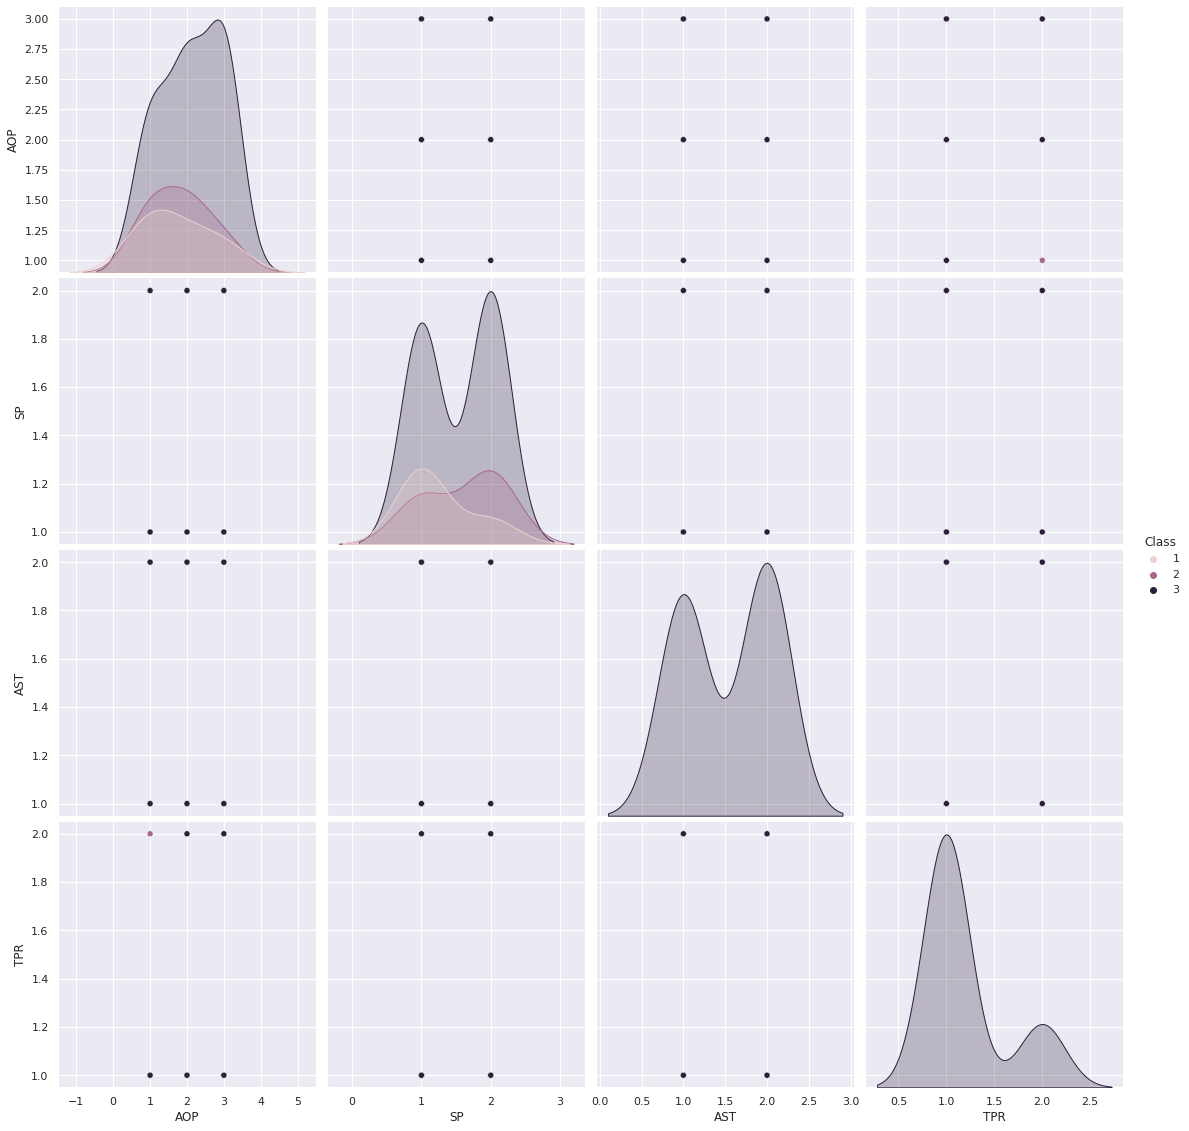

In [ ]:
sns.pairplot(df, hue='Class', height=4)


###Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

<function matplotlib.pyplot.plot>

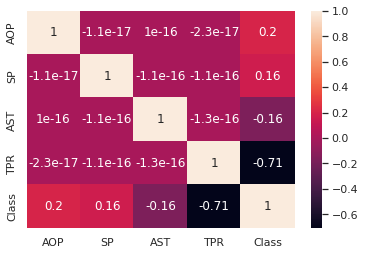

In [ ]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.plot

## Linear regression

Allows to predict the behavior of a variable (dependent or predicted) from another (independent or predictor).

### First Graph  [Tear Production Rate (y) - Astigmatic (x)]




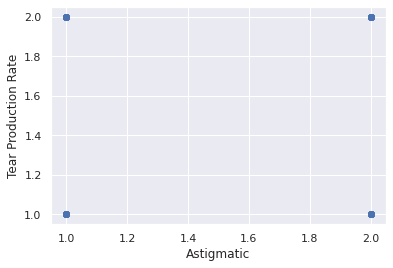

In [ ]:
# Graphing
plt.scatter(df['AST'], df['TPR'])
plt.xlabel('Astigmatic')
plt.ylabel('Tear Production Rate')
plt.show()

In [ ]:
# Data transformation
x = df['AST'].values.reshape(-1,1)
y = df['TPR'].values.reshape(-1,1)

# Fit data
regressor.fit(x,y)

LinearRegression()

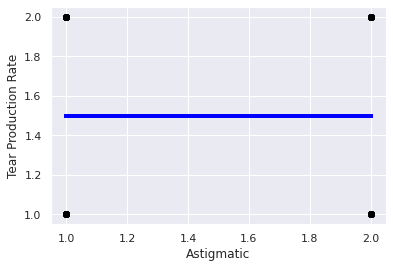

In [ ]:
plt.scatter(df['AST'], df['TPR'], color='black')
plt.plot(x, regressor.predict(x), color='blue', linewidth=4)
plt.xlabel('Astigmatic')
plt.ylabel('Tear Production Rate')
plt.show()

In [ ]:
regressor.intercept_ # Interception with the axis y

array([1.5])

In [ ]:
regressor.coef_ # Relationship coefficient

array([[4.53246652e-17]])

In [ ]:
regressor.score(df['AST'].values.reshape(-1,1), df['TPR'].values.reshape(-1,1)) # Coefficient of determination of the prediction

0.0

In [ ]:
corr, _=pearsonr(df["AST"], df["TPR"])
corr

0.0

### Second Graph [Tear Production rate (y) - spectacle prescription (x)]

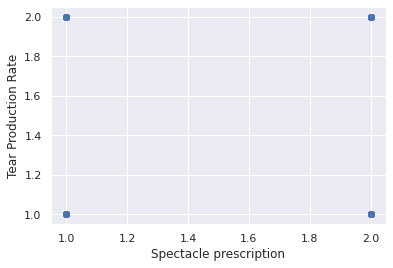

In [ ]:
# Graphing
plt.scatter(df['SP'], df['TPR'])
plt.xlabel('Spectacle prescription')
plt.ylabel('Tear Production Rate')
plt.show()

In [ ]:
# Data transformation
x = df['SP'].values.reshape(-1,1)
y = df['TPR'].values.reshape(-1,1)

# Fit data
regressor.fit(x,y)

LinearRegression()

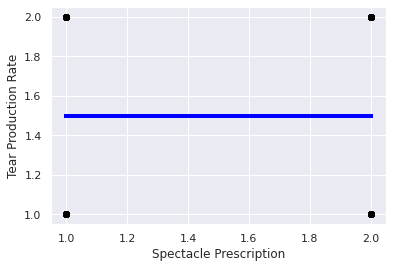

In [ ]:
plt.scatter(df['SP'], df['TPR'], color='black')
plt.plot(x, regressor.predict(x), color='blue', linewidth=4)
plt.xlabel('Spectacle Prescription')
plt.ylabel('Tear Production Rate')
plt.show()

In [ ]:
regressor.intercept_ # Interception with the axis y

array([1.5])

In [ ]:
regressor.coef_ # Relationship coefficient

array([[0.]])

In [ ]:
regressor.score(x, y) # Coefficient of determination of the prediction

0.0

In [ ]:
corr, _=pearsonr(df["SP"], df["TPR"])
corr

0.0

### Third Graph [Tear Production Rate (x) - Age Of The Patient (y)]

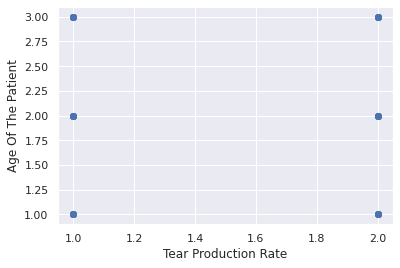

In [ ]:
# Graphing
plt.scatter(df['TPR'], df['AOP'])
plt.ylabel('Age Of The Patient')
plt.xlabel('Tear Production Rate')
plt.show()

In [ ]:
# Data transformation
x = df['TPR'].values.reshape(-1,1)
y = df['AOP'].values.reshape(-1,1)

# Fit data
regressor.fit(x,y)

LinearRegression()

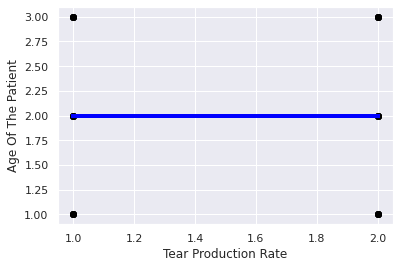

In [ ]:
plt.scatter(df['TPR'], df['AOP'], color='black')
plt.plot(x, regressor.predict(x), color='blue', linewidth=4)
plt.xlabel('Tear Production Rate')
plt.ylabel('Age Of The Patient')
plt.show()

In [ ]:
regressor.intercept_ # Interception with the axis y

array([2.])

In [ ]:
regressor.score(x, y) # Coefficient of determination of the prediction

0.0

### Fourth Graph [Age Of The Patient (x) - Astigmatic (y)]

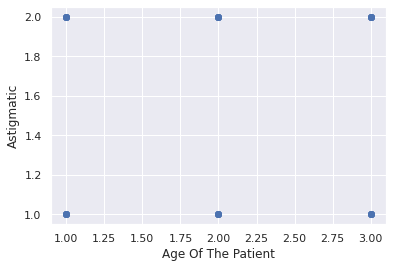

In [ ]:
# Graphing
plt.scatter(df['AOP'], df['AST'])
plt.xlabel('Age Of The Patient')
plt.ylabel('Astigmatic')
plt.show()

In [ ]:
# Data transformation
x = df['AOP'].values.reshape(-1,1)
y = df['AST'].values.reshape(-1,1)

# Fit data
regressor.fit(x,y)

LinearRegression()

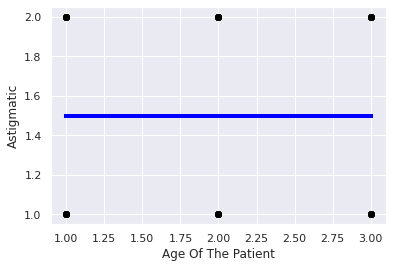

In [ ]:
plt.scatter(df['AOP'], df['AST'], color='black')
plt.plot(x, regressor.predict(x), color='blue', linewidth=4)
plt.xlabel('Age Of The Patient')
plt.ylabel('Astigmatic')
plt.show()

### Fifth Graph [Age Of The Patient (X) - Spectacle Prescription (Y)]

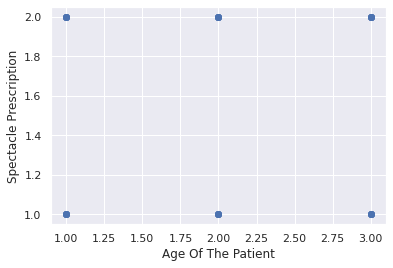

In [ ]:
# Graphing
plt.scatter(df['AOP'], df['SP'])
plt.xlabel('Age Of The Patient')
plt.ylabel('Spectacle Prescription')
plt.show()

In [ ]:
# Data transformation
x = df['AOP'].values.reshape(-1,1)
y = df['SP'].values.reshape(-1,1)

# Fit data
regressor.fit(x,y)

LinearRegression()

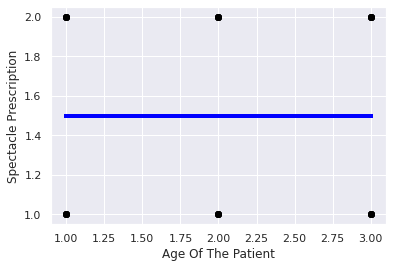

In [ ]:
plt.scatter(df['AOP'], df['SP'], color='black')
plt.plot(x, regressor.predict(x), color='blue', linewidth=4)
plt.xlabel('Age Of The Patient')
plt.ylabel('Spectacle Prescription')
plt.show()

## Measures of dispersion


In [ ]:
# Data
class_one_data = []
class_two_data = []
class_three_data = []

for i in range(4):
  one = genfromtxt('class_one.csv', skip_header=1, delimiter=",", usecols=(i))
  class_one_data.append(one)

  two = genfromtxt('class_two.csv', skip_header=1, delimiter=",", usecols=(i))
  class_two_data.append(two)

  three = genfromtxt('class_three.csv', skip_header=1, delimiter=",", usecols=(i))
  class_three_data.append(three)

class_one_data[0]
#limite inferior = Q1 - 1.5(IQR)
#limite superior = Q3 + 1.5(IQR)

array([1., 1., 2., 3.])

In [ ]:
# Quartiles and interquartile range

iqr_class_one = []
quartiles_one = []

iqr_class_two = []
quartiles_two = []

iqr_class_three = []
quartiles_three = []

for i in range(4):
  q3_one, q1_one = np.percentile(class_one_data[i], [75, 25])
  quartiles_one.append([q3_one,q1_one])
  iqr_one = q3_one - q1_one
  iqr_class_one.append(iqr_one)

  q3_two, q1_two = np.percentile(class_two_data[i], [75, 25])
  quartiles_two.append([q3_two,q1_two])
  iqr_two = q3_two - q1_two
  iqr_class_two.append(iqr_two)

  q3_three, q1_three = np.percentile(class_three_data[i], [75, 25])
  quartiles_three.append([q3_three,q1_three])
  iqr_three = q3_three - q1_three
  iqr_class_three.append(iqr_three)

inferior_limits_one = []
superior_limits_one = []

inferior_limits_two = []
superior_limits_two = []

inferior_limits_three = []
superior_limits_three = []
 
for i in range(4): 
  value_inf_one = quartiles_one[i][1] - 1.5*(iqr_class_one[i])
  inferior_limits_one.append(value_inf_one)
  value_sup_one = quartiles_one[i][0] + 1.5*(iqr_class_one[i])
  superior_limits_one.append(value_sup_one)

  value_inf_two = quartiles_two[i][1] - 1.5*(iqr_class_two[i])
  inferior_limits_two.append(value_inf_two)
  value_sup_two = quartiles_two[i][0] + 1.5*(iqr_class_two[i])
  superior_limits_two.append(value_sup_two)

  value_inf_three = quartiles_three[i][1] - 1.5*(iqr_class_three[i])
  inferior_limits_three.append(value_inf_three)
  value_sup_three = quartiles_three[i][0] + 1.5*(iqr_class_three[i])
  superior_limits_three.append(value_sup_three)


In [ ]:
iqr_class_one

[1.25, 0.25, 0.0, 0.0]

In [ ]:
inferior_limits_two, superior_limits_two

([-0.5, -0.5, 1.0, 2.0], [3.5, 3.5, 1.0, 2.0])

In [ ]:
inferior_limits_three, superior_limits_three

([-0.75, -0.5, -0.5, 1.0], [5.25, 3.5, 3.5, 1.0])

In [ ]:
# Variance
df.var()

AOP      0.695652
SP       0.260870
AST      0.260870
TPR      0.260870
Class    0.606884
dtype: float64

## Measures of central tendency

A central tendency is a central or typical value for a probability distribution. 

1. Mean: represents equitable distribution, balance, equity. It is the value that the data will have, if all of them turned out to be equal.
2. Median: The median is the value that occupies the center of all the data when they are ordered from smallest to largest.
3. Mode: is the data that is repeated the most times, or that has the highest frequency of appearance.



In [ ]:
df.groupby('Class').agg(['mean', 'median', pd.Series.mode])

AOP                       SP                   AST              \
           mean median    mode      mean median mode      mean median mode   
Class                                                                        
1      1.750000    1.5       1  1.250000    1.0    1  2.000000    2.0    2   
2      1.800000    2.0  [1, 2]  1.600000    2.0    2  1.000000    1.0    1   
3      2.133333    2.0       3  1.533333    2.0    2  1.533333    2.0    2   

       TPR              
      mean median mode  
Class                   
1      2.0    2.0    2  
2      2.0    2.0    2  
3      1.2    1.0    1

# Atypical values

These values represent the data that are outside the limits generated by the quartiles, that is; data that is outside the established normality within the data.

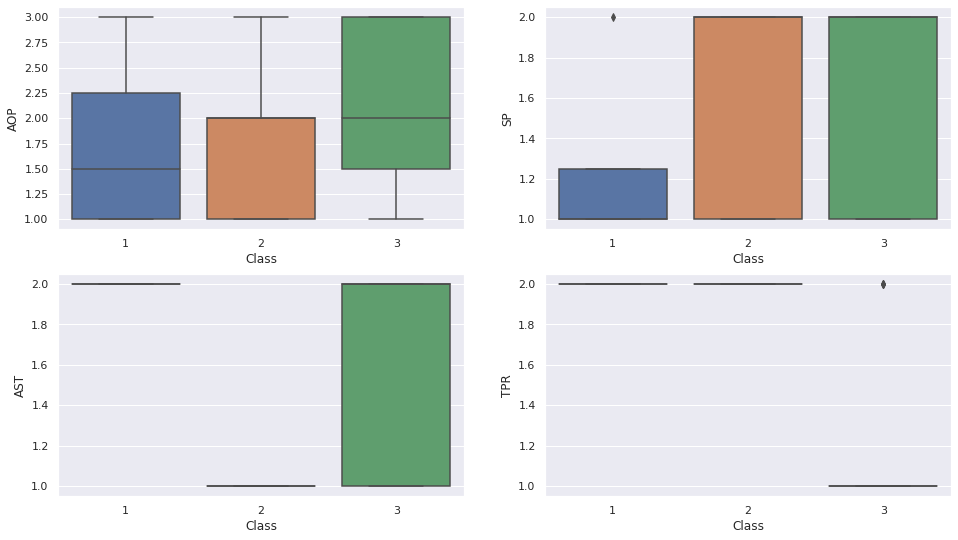

In [ ]:
fig,axes=plt.subplots(2,2, figsize=(16,9)) # -> figsize es la relacion 16x9
sns.boxplot(y="AOP", x="Class", data=df, orient="v", ax=axes[0,0])
sns.boxplot(y="SP", x="Class", data=df, orient="v", ax=axes[0,1])
sns.boxplot(y="AST", x="Class", data=df, orient="v", ax=axes[1,0])
sns.boxplot(y="TPR", x="Class", data=df, orient="v", ax=axes[1,1])
plt.show()

# Data density distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

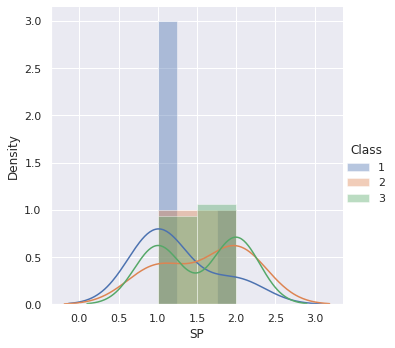

In [ ]:
# Spectacle prescription
sns.FacetGrid(df,hue="Class", height=5)\
.map(sns.distplot, "SP")\
.add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

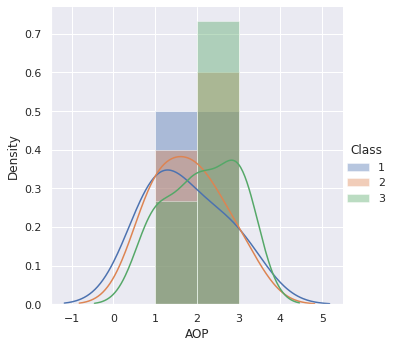

In [ ]:
# Age of the patient
sns.FacetGrid(df,hue="Class", height=5)\
.map(sns.distplot, "AOP")\
.add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

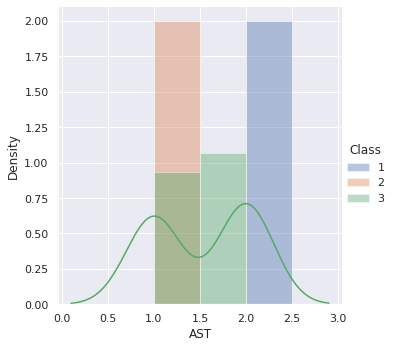

In [ ]:
# Astigmatic
sns.FacetGrid(df,hue="Class", height=5)\
.map(sns.distplot, "AST")\
.add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

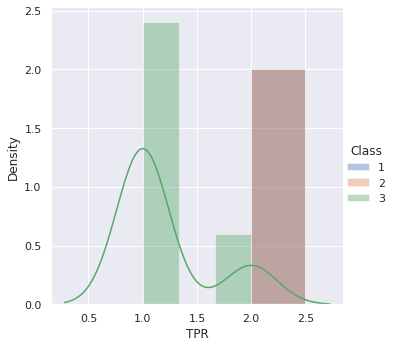

In [ ]:
# Tear production rate
sns.FacetGrid(df,hue="Class", height=5)\
.map(sns.distplot, "TPR")\
.add_legend()
plt.show()

# Data classification



In [ ]:
# Algorithm

def minimum_distance(x, prototypes, prototypes_tag):
  clasification=[]
  for p in x:
    distance=[]
    for j in prototypes:
      distance.append(np.dot(p,j) -0.5*np.dot(j,j))
    index=distance.index(max(distance))
    clasification.append(prototypes_tag[index])
  return(clasification) 

prototypes = genfromtxt('data_training.csv', skip_header=1, delimiter=",", usecols=(0,1,2,3))

x = genfromtxt('data_validation.csv', skip_header=1, delimiter=",", usecols=(0,1,2,3))

prototype_tag = genfromtxt('data_training.csv', skip_header=1, delimiter=",", usecols=(4))

validation_tag = genfromtxt('data_validation.csv', skip_header=1, delimiter=",", usecols=(4))

In [ ]:
minimum_distance(x,prototypes, prototype_tag)


[3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 1.0]

In [ ]:
successes = sum(x == y for x, y in zip(minimum_distance(x,prototypes, prototype_tag), validation_tag))

In [ ]:
print("Rendimiento: ", successes/len(validation_tag)*100, "%")

Rendimiento:  75.0 %


## Matrix of correlation

In [ ]:
df.corr()

,AOP,SP,AST,TPR,Class
AOP,1.000000e+00,-1.133117e-17,1.019805e-16,-2.266233e-17,0.200745
SP,-1.133117e-17,1.000000e+00,-1.110223e-16,-1.110223e-16,0.163908
AST,1.019805e-16,-1.110223e-16,1.000000e+00,-1.295260e-16,-0.163908
TPR,-2.266233e-17,-1.110223e-16,-1.295260e-16,1.000000e+00,-0.710266
Class,2.007449e-01,1.639075e-01,-1.639075e-01,-7.102659e-01,1.000000


## Matrix of covariance

In [ ]:
df.cov()

,AOP,SP,AST,TPR,Class
AOP,0.695652,0.000000,0.000000,0.000000,0.130435
SP,0.000000,0.260870,0.000000,0.000000,0.065217
AST,0.000000,0.000000,0.260870,0.000000,-0.065217
TPR,0.000000,0.000000,0.000000,0.260870,-0.282609
Class,0.130435,0.065217,-0.065217,-0.282609,0.606884


# PCA

In [ ]:
# Normalizate data, for assurrance to varianza = 1
from sklearn.preprocessing import StandardScaler

# Eliminate class column
x = df.drop(["Class"], axis=1)
x


,AOP,SP,AST,TPR
0,1,1,2,2
1,1,2,2,2
2,2,1,2,2
3,3,1,2,2
4,1,1,1,2
5,1,2,1,2
6,2,1,1,2
7,2,2,1,2
8,3,2,1,2
9,1,1,1,1


In [ ]:
x_normal = StandardScaler().fit_transform(x)
df_normal = pd.DataFrame(x_normal, columns=["AOP", "SP", "AST", "TPR"])

In [ ]:
df_normal["Class"] = df["Class"]
df_normal

,AOP,SP,AST,TPR,Class
0,-1.224745,-1.0,1.0,1.0,1
1,-1.224745,1.0,1.0,1.0,1
2,0.000000,-1.0,1.0,1.0,1
3,1.224745,-1.0,1.0,1.0,1
4,-1.224745,-1.0,-1.0,1.0,2
5,-1.224745,1.0,-1.0,1.0,2
6,0.000000,-1.0,-1.0,1.0,2
7,0.000000,1.0,-1.0,1.0,2
8,1.224745,1.0,-1.0,1.0,2
9,-1.224745,-1.0,-1.0,-1.0,3


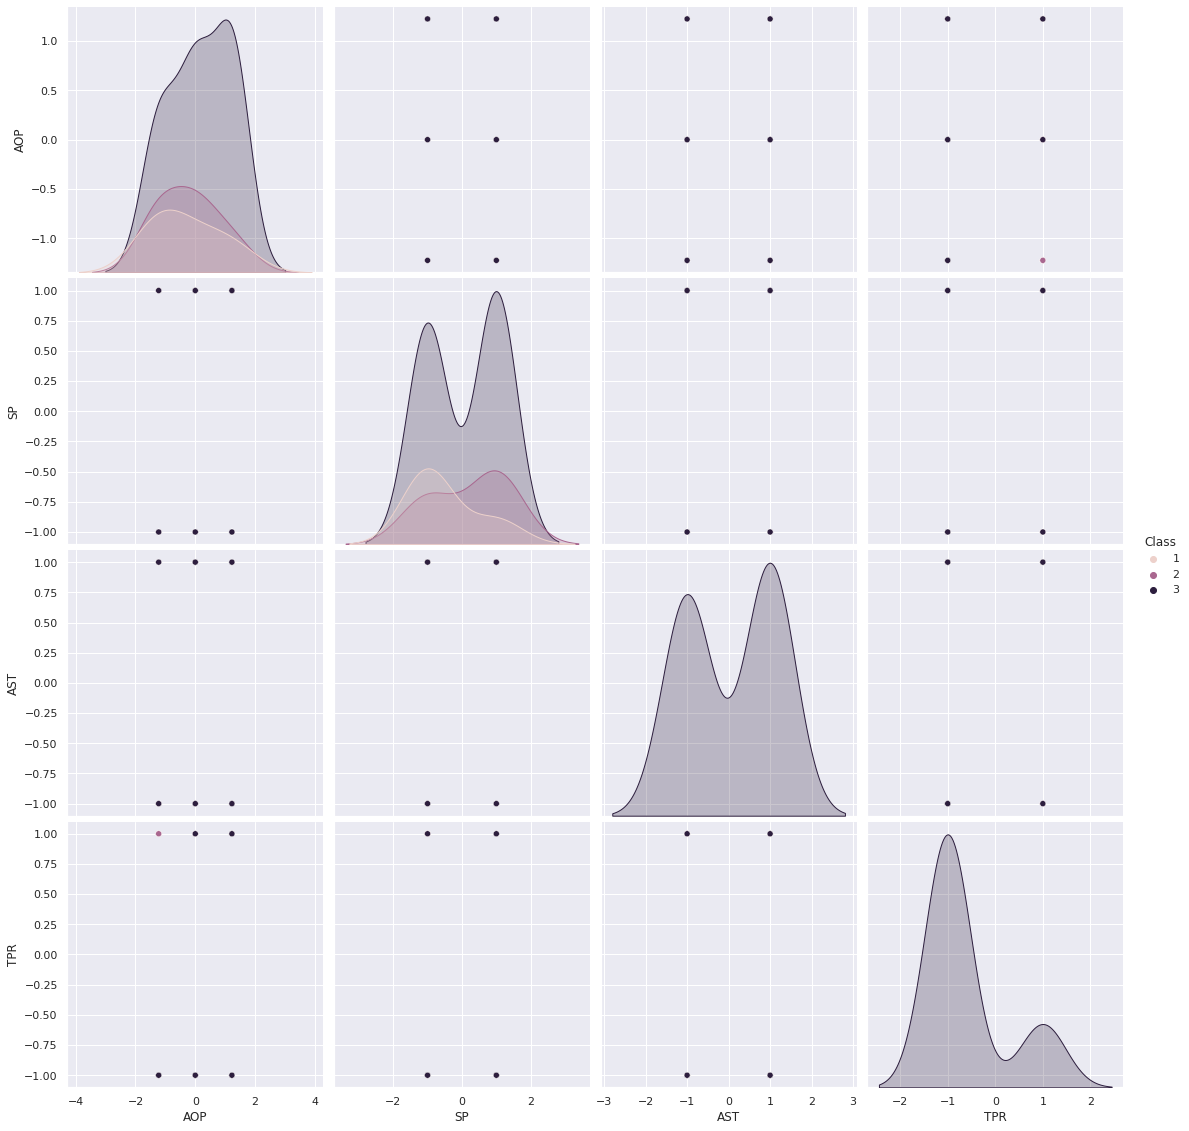

In [ ]:
sns.pairplot(df_normal, hue="Class", height=4)

In [ ]:
df_normal["TPR"].var(), df["TPR"].var()

(1.0434782608695652, 0.2608695652173913)

In [ ]:
# Components
pca = PCA(n_components=3)

In [ ]:
# Main Components
principalComponents = pca.fit_transform(x_normal)


In [ ]:
# Covariance Matrix
pca.get_covariance()

array([[ 1.04347826e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.04347826e+00, -1.48029737e-16,
        -2.96059473e-16],
       [ 0.00000000e+00, -1.48029737e-16,  1.04347826e+00,
        -5.92118946e-17],
       [ 0.00000000e+00, -2.96059473e-16, -5.92118946e-17,
         1.04347826e+00]])

In [ ]:
principal_df = pd.DataFrame(principalComponents, columns=["Principal C1", "Principal C2", "Principal C3"])

In [ ]:
principal_df.var()

Principal C1    1.043478
Principal C2    1.043478
Principal C3    1.043478
dtype: float64

<bound method Axes3D.plot of <matplotlib.axes._subplots.Axes3DSubplot object at 0x7fab4b916310>>

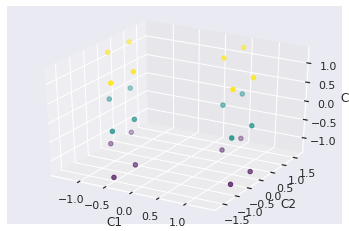

In [ ]:
# create arrays for the data points
X = principal_df["Principal C1"]
Y = principal_df["Principal C2"]
Z = principal_df["Principal C3"]


# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z,cmap='viridis')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')

ax.plot3D

In [ ]:
final_df = pd.concat([principal_df, df["Class"]], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


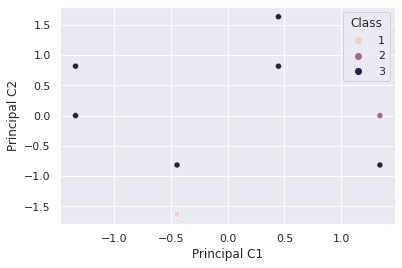

In [ ]:
sns.scatterplot(final_df["Principal C1"], final_df["Principal C2"], hue=final_df["Class"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


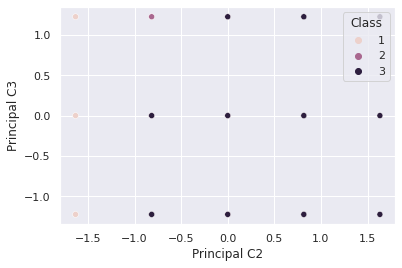

In [ ]:
sns.scatterplot(final_df["Principal C2"], final_df["Principal C3"], hue=final_df["Class"])

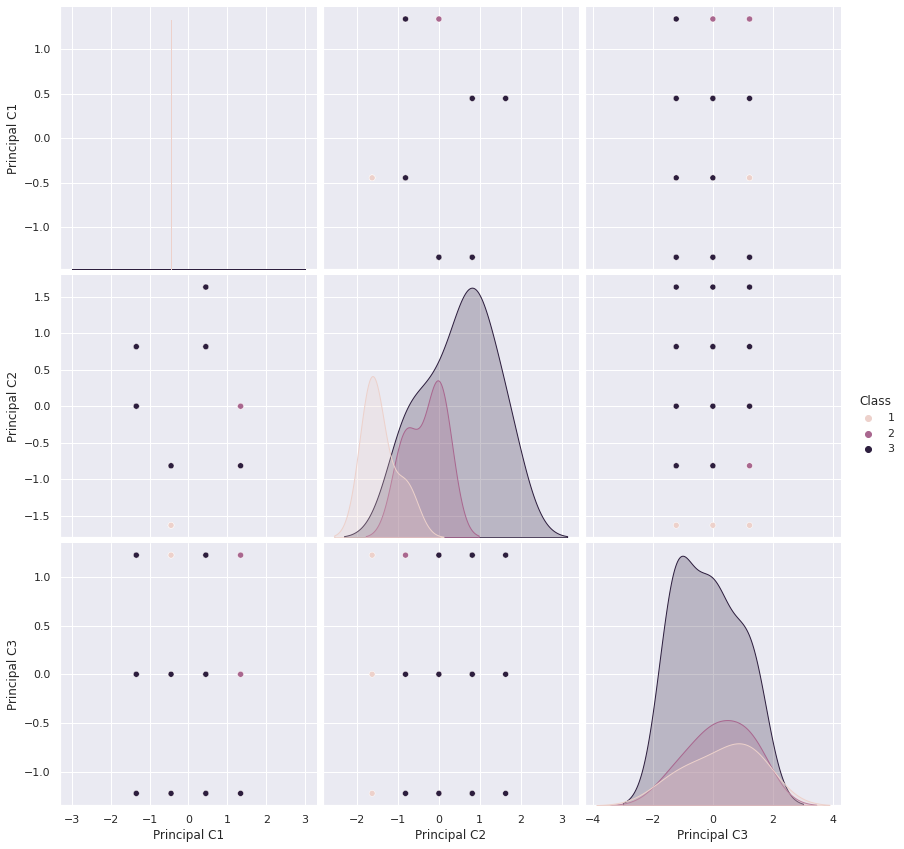

In [ ]:
sns.pairplot(final_df, hue="Class", height=4)

In [ ]:
# Data for component
explained_variance = pca.explained_variance_ratio_
explained_variance
a = explained_variance
sum = 0
for v in a:
  sum+=v
sum*100

75.00000000000001

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Class"])

Text(0, 0.5, 'Principal components')

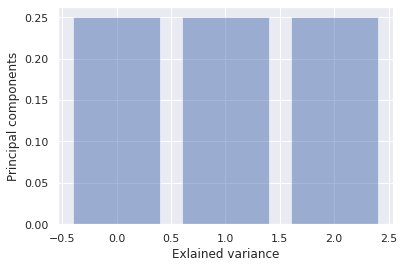

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(3),explained_variance,alpha=0.5,align='center')
plt.xlabel('Exlained variance')
plt.ylabel('Principal components')

In [ ]:
data_training = final_df.drop(["Class"],axis=1)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50,10), random_state=1)
clf.fit(data_training, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50, 10), random_state=1,
              solver='lbfgs')

In [ ]:
clf.score(data_training, y)



1.0